# 机器学习入门__一元线性回归
## [一元线性回归与代价函数（损失函数）](https://blog.csdn.net/aabb7654321/article/details/101534122)
~~~
import numpy as np
import matplotlib.pyplot as plt
 
#载入数据
data = np.genfromtxt("data.csv",delimiter=",")#加载文件，分隔符为逗号
x_data = data[:,0]#存储第0列的所有数据
y_data = data[:,1]#存储第1列的所有数据
 
#学习率
lr = 0.0001
#截距
b = 0.0
#斜率
k = 0.0
#最大迭代次数
epochs = 50
 
#最小二乘法
def compute_error(b, k, x_data, y_data):
    totalError = 0
    for i in range(0,len(x_data)):
        totalError += (y_data[i] - (k * x_data[i] + b)) ** 2
    return totalError / float(len(x_data)) / 2.0
 
 
#梯度下降法求最小值
def gradient_descent_runner(x_data, y_data, b, k, lr, epochs):
    #计算总数据量
    m = len(x_data)
    #循环epochs次
    for i in range(epochs):
        b_grade = 0
        k_grade = 0
        #计算梯度总和在求平均
        for j in range(0, len(x_data)):
            b_grade += -(1/m) * (y_data[j] - (k * x_data[j] + b))
            k_grade += -(1/m) * (y_data[j] - (k * x_data[j] + b)) * x_data[j]
        #更新学习率
        b = b - (lr * b_grade)
        k = k - (lr * k_grade)
 
    return b,k 
 
 
print("Starting b = {0}, k = {1}, error = {2}".format(b, k, compute_error(b, k, x_data, y_data)))
print("Running...")
b,k = gradient_descent_runner(x_data, y_data, b, k, lr, epochs)
print("After {0} iterations b = {1}, k = {2}, error = {3}".format(epochs, b, k, compute_error(b, k, x_data, y_data)))
 
#画图
plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, k*x_data+b, 'r')
plt.show()
~~~

In [183]:
'''
:@Author: Xiangyu Zhao
:@Date: 8/19/2023, 5:46:43 AM
:@LastEditors: Xiangyu Zhao
:@LastEditTime: 8/19/2023, 5:46:43 AM
:Description:   
:Copyright: Copyright (©)}) 2023 Xiangyu Zhao. All rights reserved.
'''
import numpy as np
import matplotlib.pyplot as plt

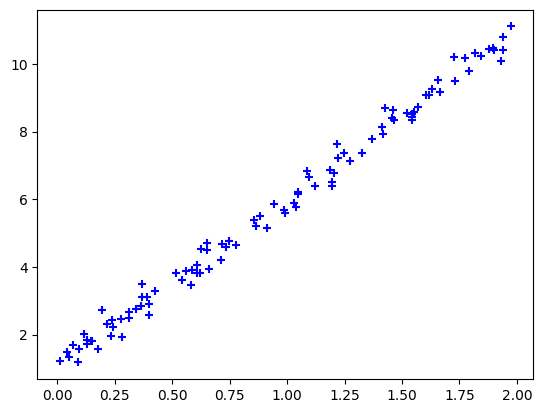

In [184]:
#数据准备
np.random.seed(42)
x=2 *np.random.rand(100,1)
y=1+5*x+np.random.randn(100,1)*0.3
plt.scatter(x,y,marker='+',color='blue')

In [185]:
#数据处理
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

x=torch.from_numpy(x).float()
y=torch.from_numpy(y).float()
dataset=TensorDataset(x,y)

dataloader=DataLoader(dataset,batch_size=16,shuffle=True)

In [186]:
print('Len of DataLoader',len(dataloader))
for index,(data,label) in enumerate(dataloader):
    print(f'index={index},num={len(data):2}')#,data={data},label={label}

Len of DataLoader 7
index=0,num=16
index=1,num=16
index=2,num=16
index=3,num=16
index=4,num=16
index=5,num=16
index=6,num= 4


tensor([-0.5142], requires_grad=True)
tensor([1.3505], requires_grad=True)
0.07733645290136337
w:4.929610252380371
b:1.0704729557037354


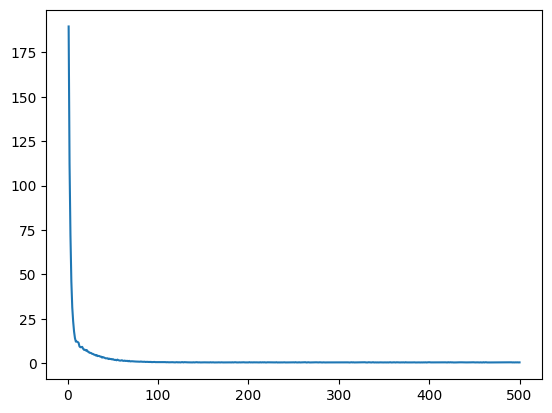

In [187]:
epoch=500
lr=0.01
w=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)
print(w)
print(b)
Loss=[]
for epoch in range(1,epoch+1):
    sum_loss=0
    for batch_id,(bx,by) in enumerate(dataloader):
        h =bx*w + b
        loss= torch.mean((h-by)**2)
        # print('Loss',loss)
        sum_loss+=loss.item()
        loss.backward()
        # print('wg:',w.grad.data,'bg:',b.grad.data)
        # print('w:',w.data,'b:',b.data)
        w.data-=lr*w.grad.data
        b.data-=lr*b.grad.data
        # print('w:',w.data,'b:',b.data)
        w.grad.zero_()
        b.grad.zero_()
        # print('wg:',w.grad.data,'bg:',b.grad.data)
        # print(f'epoch:{epoch},batch:{batch_id},loss={loss}')
    # print(f'epoch:{epoch},loss={sum_loss}')
    Loss.append(sum_loss)
print(loss.item())
print(f'w:{w.item()}')
print(f'b:{b.item()}')
Loss_x=[i for i in range(1,epoch+1)]
plt.plot(Loss_x,Loss)
plt.show()

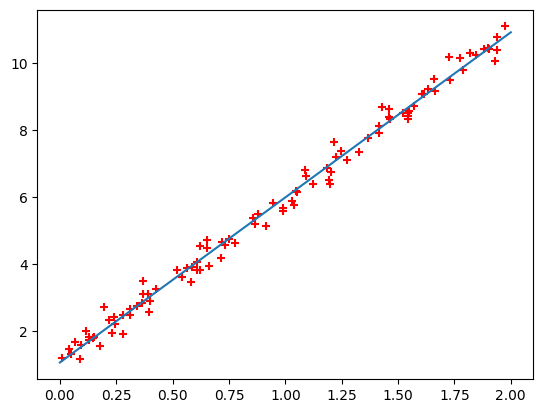

In [188]:
w=w.item()
b=b.item()
xx=np.linspace(0,2,100)
h=w * xx+ b
plt.plot(xx,h)
plt.scatter(x,y,marker='+',color='red')
plt.show()